# Data preparation | Features Engineering

## Variable naming

In [54]:
variable_names = ["accounts", "duration_credit", "history_credit", "object_credit", "amount_credit", "savings",
"employment_old", "effort_rate", "family_status", "guarantees", "home_old",
"property", "age", "other_credits", "home_status", "nb_credits", "job_type",
"nb_of_dependants", "telephone", "foreigner", "presence_unpaid"]

## Assigning variables to defined names

In [55]:
import pandas as pd
import requests
from io import StringIO

# download the dataset directly from the URL 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"


response = requests.get(url)
data = response.text
credit = pd.read_csv(StringIO(data), sep=" ", header=None, names=variable_names)
credit.head()


,accounts,duration_credit,history_credit,object_credit,amount_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,age,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,foreigner,presence_unpaid
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [56]:
# Add the key for each observation

credit = credit.reset_index().rename(columns={"index": "Key"})
credit.drop("foreigner", axis=1, inplace=True)
credit.head()

,Key,accounts,duration_credit,history_credit,object_credit,amount_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,age,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,presence_unpaid
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,1
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,2
2,2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,1
3,3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,1
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,2


In [57]:
# encoding: change 1/2 to 1/0

from sklearn.preprocessing import LabelEncoder

credit["presence_unpaid"] = credit["presence_unpaid"].map({1: 0, 2: 1})
credit["presence_unpaid"] = credit["presence_unpaid"].astype("category")

In [60]:
# Categorisation of variables to avoid compatibility problems

varquali = ["accounts", "history_credit", "object_credit", "savings", "employment_old",
"family_status", "guarantees", "property", "other_credits", "home_status",
"job_type", "nb_of_dependants", "telephone"]

for v in varquali:
    credit[v] = credit[v].astype("category")

varquanti = ["duration_credit", "amount_credit", "effort_rate", "home_old", "age", "nb_credits"]


# remove the key

vars = ~credit.columns.str.contains("Key")

credit = credit.loc[:, vars]

credit.to_csv('credit.csv', index=False)
credit.head()

,accounts,duration_credit,history_credit,object_credit,amount_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,age,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,presence_unpaid
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,1


# Data mining

In [61]:
credit.describe()

,duration_credit,amount_credit,effort_rate,home_old,age,nb_credits
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000


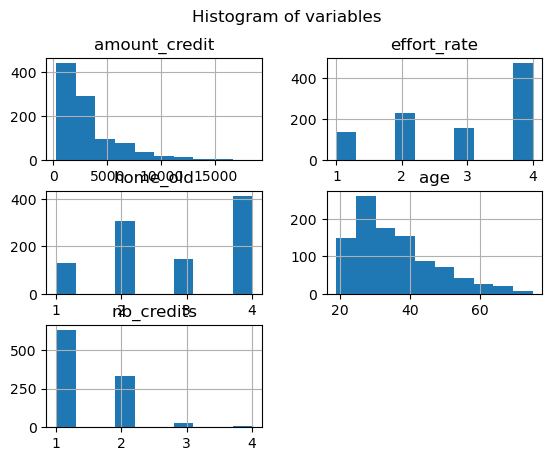

In [62]:
import matplotlib.pyplot as plt

columns = credit.columns[2:18]
credit[columns].hist()

plt.suptitle('Histogram of variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## Analysis of continuous variables

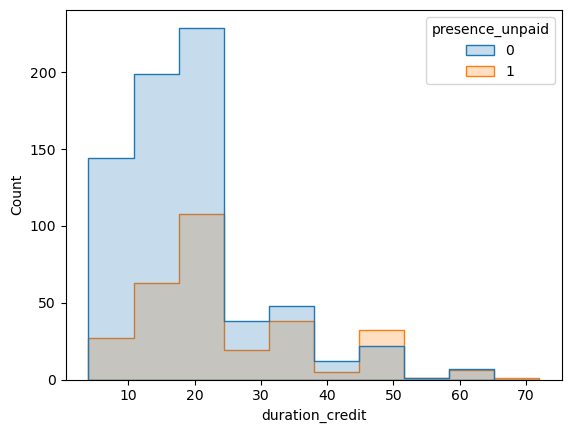

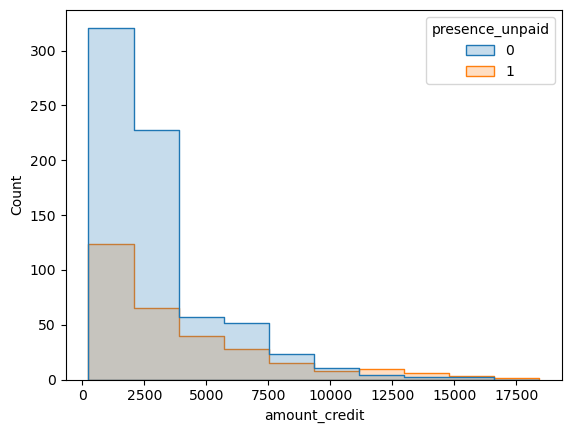

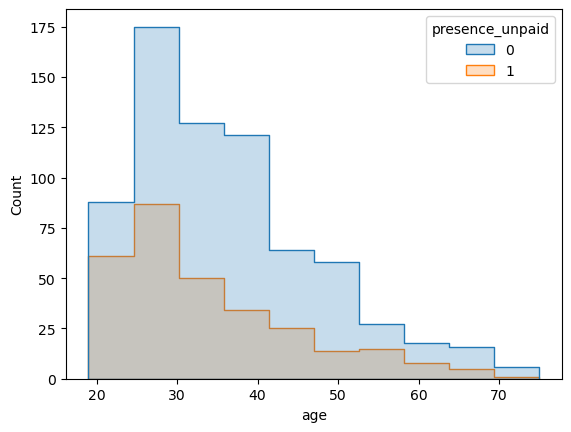

In [63]:
import seaborn as sns

sns.histplot(data=credit, x="duration_credit", hue="presence_unpaid", element="step", bins=10)
plt.show()

sns.histplot(data=credit, x="amount_credit", hue="presence_unpaid", element="step", bins=10)
plt.show()

sns.histplot(data=credit, x="age", hue="presence_unpaid", element="step", bins=10)
plt.show()


The duration of credit shows predictable peaks at 12, 24, 36, 18 and 60 months. We can see quite clearly that a higher proportion of longer loans are taken out by those with arrears, particularly loans of 48 months or more.


Very small loans are rare (the minimum is 250 euros and 95% exceed 700 euros). The next highest frequency is around 1,200 euros, which then decreases. The highest proportion of higher amounts is found among loans that are in arrears. The distribution is fairly regular and there are no apparent anomalies. The difference between the distribution of good and bad files seems to be smaller for the amount of credit than for its duration.

  
The age of the borrowers is between 19 and 75. There is a more even distribution for loans with no arrears than for the others. The majority of borrowers under the age of 35 at the time the loan is granted are in arrears. After this age, the histograms of good and bad loans are more similar. 

In [64]:
pd.set_option('display.max_columns', None)
summary = credit.groupby('presence_unpaid')[['age', 'duration_credit', 'amount_credit']].describe()
summary

age                                                       \
                 count       mean        std   min   25%   50%    75%   max   
presence_unpaid                                                               
0                700.0  36.224286  11.381145  19.0  27.0  34.0  42.25  75.0   
1                300.0  33.963333  11.222379  19.0  25.0  31.0  40.00  74.0   

                duration_credit                                               \
                          count       mean        std  min   25%   50%   75%   
presence_unpaid                                                                
0                         700.0  19.207143  11.079564  4.0  12.0  18.0  24.0   
1                         300.0  24.860000  13.282639  6.0  12.0  24.0  36.0   

                      amount_credit                                           \
                  max         count         mean          std    min     25%   
presence_unpaid                                                                
0                60.0         700.0  2985.457143  2401.472278  250.0  1375.5   
1                72.0         300.0  3938.126667  3535.818955  433.0  1352.5   

                                           
                    50%      75%      max  
presence_unpaid                            
0                2244.0  3634.75  15857.0  
1                2574.5  5141.50  18424.0

We can see that the 3 continuous variables each show a significant relationship with the variable to be explained, which we can measure using an ANOVA test. However, here we prefer a non-parametric test, the Kruskal-Wallis test. This type of test avoids the assumptions of normality and homoscedasticity that are usual in parametric tests.
  
On our data, this test confirms that the link is weaker for the amount than for the duration of credit.

### Kruskal-Wallis test

The Kruskal-Wallis test is a non-parametric extension of the one-factor ANOVA. It is used to compare the medians of three or more groups. 

The formula for the Kruskal-Wallis test is as follows:

$$
H=\frac{12} {N(N+1)} ∑_{i=1}^g \: \frac{R_i^2}{n_i}−3(N+1)
$$
where :

* N is the total number of observations for all groups.
* g is the number of groups.
* R_i is the sum of the ranks for the ith group.
* n_i is the number of observations in the ith group.

If the null hypothesis is true (i.e. all groups have the same median), then the H statistic follows approximately a chi-square distribution with g-1 degrees of freedom (where g is the number of groups). If H is large enough, this would indicate that the groups have different medians.

In [65]:
from scipy.stats import kruskal

age_statistic, _ = kruskal(credit[credit['presence_unpaid'] == 0]['age'],
                           credit[credit['presence_unpaid'] == 1]['age'])
print('Kruskal chi² on the variable [age]')  
print(age_statistic)

duration_credit_statistic, _ = kruskal(credit[credit['presence_unpaid'] == 0]['duration_credit'],
                                    credit[credit['presence_unpaid'] == 1]['duration_credit'])
print('Kruskal chi² on the variable[duration_credit]') 
print(duration_credit_statistic)

amount_credit_statistic, _ = kruskal(credit[credit['presence_unpaid'] == 0]['amount_credit'],
                                      credit[credit['presence_unpaid'] == 1]['amount_credit'])
print('Kruskal chi² on the variable [amount_credit]') 
print(amount_credit_statistic)

Kruskal chi² on the variable [age]
12.57424162877921
Kruskal chi² on the variable[duration_credit]
42.263859684710084
Kruskal chi² on the variable [amount_credit]
7.575879598542001


 The Kruskal-Wallis X² has the advantage of being easy to read and widely applicable, but has the same disadvantage as any X² statistic, namely its dependence on the number of individuals: the larger the population, the higher the X². Since the associated probability is not easy to read, one solution is to calculate a standardised X² (or rather X), like Cramer's V.

$$
\chi^2 normalized=\sqrt\frac{\chi^2  KW}{staff}
$$

 We obtain a variable that is comparable from one sample to another, regardless of its size, and which here is 0.206 for the duration of credit, 0.112 for age and 0.087 for the amount of credit. Note that the number in the denominator is the number of non-missing values of the variable, and not the total number nrow(credit).

In [66]:
from scipy.stats import kruskal
import numpy as np

age_statistic, _ = kruskal(credit[credit['presence_unpaid'] == 0]['age'].dropna(),
                           credit[credit['presence_unpaid'] == 1]['age'].dropna())
age_sqrt_statistic = np.sqrt(age_statistic / sum(~credit['age'].isna()))
print('Kruskal chi² on the variable [age]')  
print(age_sqrt_statistic)

duration_credit_statistic, _ = kruskal(credit[credit['presence_unpaid'] == 0]['duration_credit'].dropna(),
                                    credit[credit['presence_unpaid'] == 1]['duration_credit'].dropna())
duration_credit_sqrt_statistic = np.sqrt(duration_credit_statistic / sum(~credit['duration_credit'].isna()))
print('Kruskal chi² on the variable [duration_credit]') 
print(duration_credit_sqrt_statistic)

amount_credit_statistic, _ = kruskal(credit[credit['presence_unpaid'] == 0]['amount_credit'].dropna(),
                                      credit[credit['presence_unpaid'] == 1]['amount_credit'].dropna())
amount_credit_sqrt_statistic = np.sqrt(amount_credit_statistic / sum(~credit['amount_credit'].isna()))
print('Kruskal chi² on the variable [amount_credit]') 
print(amount_credit_sqrt_statistic)

Kruskal chi² on the variable [age]
0.11213492599890193
Kruskal chi² on the variable [duration_credit]
0.2055817591244663
Kruskal chi² on the variable [amount_credit]
0.08703952894255576


## Discretisation of continuous variables

In [67]:

quantiles = credit['age'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
quantiles[0] -= 1
qage = pd.cut(credit['age'], quantiles)
tab = pd.crosstab(qage, credit['presence_unpaid'])
prop_tab = tab.apply(lambda x: x / x.sum(), axis=1)
print(prop_tab)


presence_unpaid         0         1
age                                
(18.0, 23.0]     0.600000  0.400000
(23.0, 26.0]     0.614815  0.385185
(26.0, 28.0]     0.702128  0.297872
(28.0, 30.0]     0.662338  0.337662
(30.0, 33.0]     0.685714  0.314286
(33.0, 36.0]     0.792793  0.207207
(36.0, 39.0]     0.756757  0.243243
(39.0, 45.0]     0.725664  0.274336
(45.0, 52.0]     0.800000  0.200000
(52.0, 75.0]     0.697917  0.302083


In [68]:
prop_tab = prop_tab.reset_index().rename(columns={'index': 'age'})
variable_name = ['age','presence_unpaid_0','presence_unpaid_1']
prop_tab.columns = variable_name

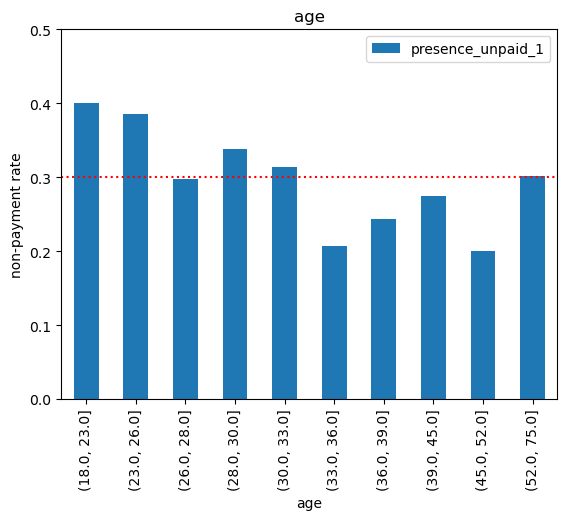

In [69]:
prop_tab.plot.bar(x='age', y='presence_unpaid_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation = 'vertical')
plt.title('age')
plt.ylabel("non-payment rate")
plt.axhline(y=0.3,linestyle=':', color='red')
plt.show()

We divide age into two brackets: under 25s and over 25s.
We then calculate the cross-tabulation of the discretised age with the variable to be explained, and display the percentages in the rows of this table.

In [70]:
age = pd.cut(credit['age'], bins=[0,25,float('Inf')], right=False)
tab = pd.crosstab(age, credit['presence_unpaid'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)
prop_tab

presence_unpaid,0,1
age,,
"[0.0, 25.0)",0.590604,0.409396
"[25.0, inf)",0.719154,0.280846


In [71]:
prop_tab = prop_tab.reset_index().rename(columns={"index": "age"})
variable_name = ['age','presence_unpaid_0', 'presence_unpaid_1']
prop_tab.columns = variable_name

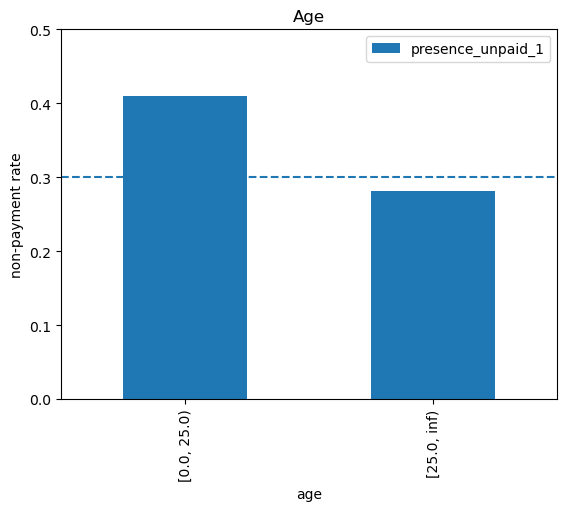

In [72]:
import matplotlib.pyplot as plt

prop_tab.plot.bar(x='age', y='presence_unpaid_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation='vertical')
plt.title("Age")
plt.ylabel("non-payment rate")
plt.axhline(y=0.3, linestyle='--')
plt.show()

We do the same with the duration of the loan

In [73]:
q = np.unique(np.percentile(credit['duration_credit'], np.arange(0, 101, 5)))
duration_credit = pd.cut(credit['duration_credit'], bins=[0, 15, 36, float('Inf')], right=False)
tab = pd.crosstab(duration_credit, credit['presence_unpaid'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)
print(prop_tab)

presence_unpaid         0         1
duration_credit                    
[0.0, 15.0)      0.790191  0.209809
[15.0, 36.0)     0.695464  0.304536
[36.0, inf)      0.517647  0.482353


In [74]:
prop_tab = prop_tab.reset_index().rename(columns={"index": "duration_credit"})
variable_name = ['duration_credit','presence_unpaid_0', 'presence_unpaid_1']
prop_tab.columns = variable_name

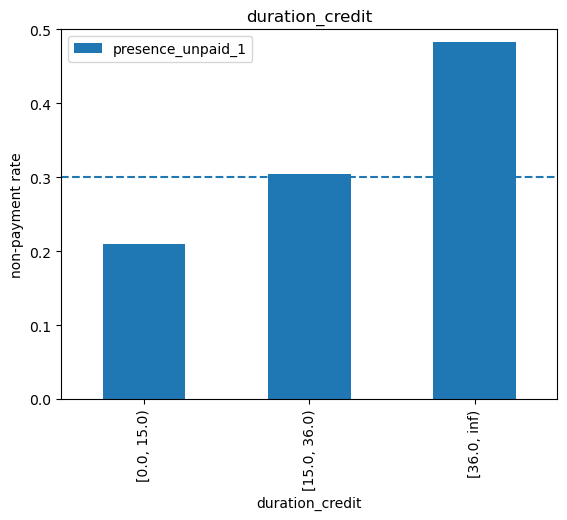

In [75]:
prop_tab.plot.bar(x='duration_credit', y='presence_unpaid_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation='vertical')
plt.title("duration_credit")
plt.ylabel("non-payment rate")
plt.axhline(y=0.3, linestyle='--')
plt.show()

We divide the threshold at 4,000 euros.

In [76]:
amount_credit = pd.cut(credit['amount_credit'], bins=[0, 4000, float('Inf')], right=False)
tab = pd.crosstab(amount_credit, credit['presence_unpaid'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)
print(prop_tab)

presence_unpaid         0         1
amount_credit                      
[0.0, 4000.0)    0.741379  0.258621
[4000.0, inf)    0.573171  0.426829


In [77]:
prop_tab = prop_tab.reset_index().rename(columns={"index": "amount_credit"})
variable_name = ['amount_credit','presence_unpaid_0', 'presence_unpaid_1']
prop_tab.columns = variable_name
print(prop_tab)

   amount_credit  presence_unpaid_0  presence_unpaid_1
0  [0.0, 4000.0)           0.741379           0.258621
1  [4000.0, inf)           0.573171           0.426829


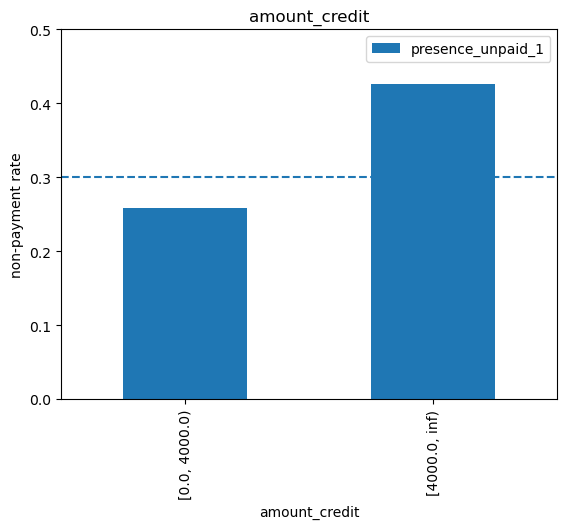

In [78]:
prop_tab.plot.bar(x='amount_credit', y='presence_unpaid_1', rot=0)
plt.ylim(0, 0.5)
plt.xticks(rotation='vertical')
plt.title("amount_credit")
plt.ylabel("non-payment rate")
plt.axhline(y=0.3, linestyle='--')
plt.show()

We can see that applicants under the age of 25, and long or large loans, are clearly riskier. 

We therefore choose to discretise the 3 continuous variables. This choice is also made by noting that only 3 variables out of 19 are not divided into classes. Classifying all the variables in this way will make them simpler and easier to read, particularly when presenting the models in the form of a score grid.

## Linkage of explanatory variables with the variable to be explained
### Cramer's V
  We will first quantify the link between each of the predictors and the variable to be explained, by calculating the Cramer's V for each pair, and then displaying the list of explanatory variables by decreasing Cramer's V value. To calculate Cramer's V, we have chosen to apply the definition of Cramer's V, which here is simply the square root of the ratio (X² / number of individuals) since the variable to be explained only has two classes.
  We create an intermediate dataframe, credit2, excluding the key, the target and the 3 continuous variables, in order to get an idea of the Cramer's V of age, duration and amount of credit, and their importance in relation to that of the other variables.

Cramér's V is a measure of the strength of the association between two nominal variables (i.e. categorical variables in no particular order). It is based on the chi-square statistic chi^2 and takes a value between 0 and 1.

The formula for Cramér's V is:

$$
V = \sqrt{\frac{\chi^2/n}{\min(k-1,r-1)}}
$$
where
- chi^2 is the value of the chi-squared statistic for the contingency table of the two variables.
- n is the total number of observations.
- k is the number of categories for the first variable.
- r is the number of categories for the second variable.

The interpretation of Cramer's V is as follows:
- V = 0: No association between the two variables.
- V = 1: Perfect association between the two variables.
- Values between 0 and 1 indicate the degree of association, with values close to 1 indicating a stronger association.

It is important to note that Cramer's V gives no indication of the nature of the relationship (for example, positive or negative), only its strength.

In [79]:

cols_to_exclude = ['Key', 'presence_unpaid', 'duration_credit', 'amount_credit', 'age']
credit2 = credit[[col for col in credit.columns if col not in cols_to_exclude]].copy() 


credit2['age'] = age
credit2['duration_credit'] = duration_credit
credit2['amount_credit'] = amount_credit


In [80]:
credit2.to_csv('credit2.csv', index=False)
credit2.head()

,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit
0,A11,A34,A43,A65,A75,4,A93,A101,4,A121,A143,A152,2,A173,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)"
1,A12,A32,A43,A61,A73,2,A92,A101,2,A121,A143,A152,1,A173,1,A191,"[0.0, 25.0)","[36.0, inf)","[4000.0, inf)"
2,A14,A34,A46,A61,A74,2,A93,A101,3,A121,A143,A152,1,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)"
3,A11,A32,A42,A61,A74,2,A93,A103,4,A122,A143,A153,1,A173,2,A191,"[25.0, inf)","[36.0, inf)","[4000.0, inf)"
4,A11,A33,A40,A61,A73,3,A93,A101,4,A124,A143,A153,2,A173,2,A191,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)"


We then run a loop over all the variables in the dataframe, calculating the Cramer V and the p-value of the X² test, which are recorded in the 2nd and 3rd columns of a cramer matrix, the first column of which contains the name of the variable. This matrix is then copied into a vcramer matrix, deleting any blank rows and copying the variables in descending order of their Cramer V with the variable to be explained.

In [81]:
from scipy.stats import chi2_contingency

cramer = []

for col_name in credit2.columns:
    contingency_table = pd.crosstab(credit2[col_name], credit['presence_unpaid'])

    chi2, p, _, _ = chi2_contingency(contingency_table)
    cramer.append([col_name, np.sqrt(chi2 / len(credit2[col_name])), p])


vcramer = pd.DataFrame(cramer, columns=["variable", "V de Cramer", "p-value Chi2"])


print(vcramer)

            variable  V de Cramer  p-value Chi2
0           accounts     0.351740  1.218902e-26
1     history_credit     0.248378  1.279187e-12
2      object_credit     0.182637  1.157491e-04
3            savings     0.189997  2.761214e-07
4     employment_old     0.135530  1.045452e-03
5        effort_rate     0.074005  1.400333e-01
6      family_status     0.098006  2.223801e-02
7         guarantees     0.081519  3.605595e-02
8           home_old     0.027373  8.615521e-01
9           property     0.154012  2.858442e-05
10     other_credits     0.113310  1.629318e-03
11       home_status     0.134907  1.116747e-04
12        nb_credits     0.051684  4.451441e-01
13          job_type     0.043418  5.965816e-01
14  nb_of_dependants     0.000000  1.000000e+00
15         telephone     0.034243  2.788762e-01
16               age     0.096825  2.199446e-03
17   duration_credit     0.202928  1.142610e-09
18     amount_credit     0.155552  8.699412e-07


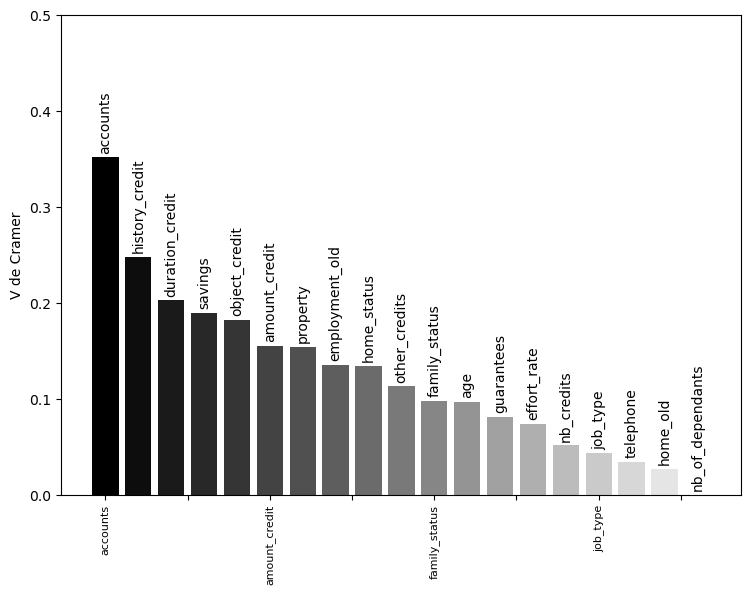

In [82]:
from matplotlib.ticker import MaxNLocator


plt.figure(figsize=(8, 6))
plt.subplots_adjust(bottom=0.15, left=0.1, right=0.95, top=0.95)


vcramer_sorted = vcramer.sort_values(by=vcramer.columns[1], ascending=False)

xlabels = vcramer_sorted.iloc[:,0].values
x_labels = vcramer_sorted.iloc[:, 0].values
y_values = vcramer_sorted.iloc[:, 1].astype(float).values

colors = [plt.cm.gray(i / len(vcramer_sorted)) for i in range(len(vcramer_sorted))]

bars = plt.bar(np.arange(len(vcramer_sorted)), y_values, color=colors)


plt.xticks(np.arange(len(vcramer_sorted)), x_labels, rotation=90)
plt.ylabel('V de Cramer')
plt.ylim(0, 0.5)
plt.tick_params(axis='x', labelsize=8)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))


for bar, label in zip(bars, x_labels):
    height = bar.get_height()
    plt.annotate(label,
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points d'espace au-dessus de la barre
                 textcoords="offset points",
                 ha='center', va='bottom', rotation=90)

plt.show()


In [83]:
def ct(x):
    print("\n", credit.columns[x], "\n")
    table = pd.crosstab(credit.iloc[:, x], credit['presence_unpaid'], normalize='index')
    margins = table.sum(axis=1)
    table = table.join(margins.rename('Total')).append(margins.rename('Total').rename(str))
    return table

exclude_columns = ["Key", "presence_unpaid", "duration_credit", "amount_credit", "age"]
for i in range(len(credit.columns)):
    if credit.columns[i] not in exclude_columns:
        print(ct(i))


 accounts 

                 0         1  Total  A11  A12  A13  A14
accounts                                               
A11       0.507299  0.492701    1.0  NaN  NaN  NaN  NaN
A12       0.609665  0.390335    1.0  NaN  NaN  NaN  NaN
A13       0.777778  0.222222    1.0  NaN  NaN  NaN  NaN
A14       0.883249  0.116751    1.0  NaN  NaN  NaN  NaN
Total          NaN       NaN    NaN  1.0  1.0  1.0  1.0

 history_credit 

                       0         1  Total  A30  A31  A32  A33  A34
history_credit                                                    
A30             0.375000  0.625000    1.0  NaN  NaN  NaN  NaN  NaN
A31             0.428571  0.571429    1.0  NaN  NaN  NaN  NaN  NaN
A32             0.681132  0.318868    1.0  NaN  NaN  NaN  NaN  NaN
A33             0.681818  0.318182    1.0  NaN  NaN  NaN  NaN  NaN
A34             0.829352  0.170648    1.0  NaN  NaN  NaN  NaN  NaN
Total                NaN       NaN    NaN  1.0  1.0  1.0  1.0  1.0

 object_credit 

                      

For the average balance on a current account, a negative balance naturally increases the risk of non-payment. A balance of over €200 reduces the rate of non-payment by more than half.

In [84]:
credit2['accounts'] = credit2['accounts'].replace({
    'A14': 'No account',
    'A11': 'CC < 0 euros',
    'A12': 'CC [0-200 euros]',
    'A13': 'CC > 200 euros'
})

Default rates are closely linked to the repayment history of the applicant. The gradation is very clear, from applicants who have already had loans that they have repaid well, which attests to good creditworthiness, to those who have had arrears with the bank or still have arrears with other banks. 

In [86]:
credit2['object_credit'] = credit2['object_credit'].replace({
    'A40': 'New car',
    'A41': 'Used car',
    'A42': 'Interior',
    'A44': 'Interior',
    'A45': 'Interior',
    'A43': 'Video-HIFI',
    'A46': 'Studies',
    'A48': 'Education',
    'A47': 'Holidays',
    'A49': 'Business',
    'A410': 'Other'
})

  Similarly for savings, we have a low rate of non-payment for those who do not have a savings product (which is different from having a savings product with zero outstanding), which simply means that their savings are with another bank. The rate of non-payment then rises sharply, taking values close to each other below €100 and between €100 and €500. We may hesitate to group together the 2 brackets "[500 - 1000 euros[" and ">= 1000 euros", as their non-payment rates are somewhat different, but the small size of these two brackets means that they should be grouped together. In view of the rates of non-payment, we could even consider grouping them with mode 1.


In [87]:
credit2['savings'] = credit2['savings'].replace({
    'A65': 'No savings',
    'A61': '< 500 euros',
    'A62': '< 500 euros',
    'A63': '> 500 euros',
    'A64': '> 500 euros'
})

  Length of employment follows a logical general trend, since a longer-standing claimant presents less risk. In detail, some points are a little surprising and may simply be due to the number of non-payments being too low to ensure perfectly reliable non-payment rates. But there may also be other explanations. An unemployed person is slightly less risky than someone who has been working for less than a year. This may be because the "unemployed" category includes not only jobseekers, but also people who have no financial need to work, and even retired people. As for the category of people who have been in work for more than 7 years, it is slightly riskier than those who have been in work for 4 to 7 years. This may be explained by the presence of older employees, who are sometimes more often the victims of job loss. In any case, in order to avoid possible inconsistencies and also to ensure that the modalities are sufficiently important, the first 2 and last 2 modalities will be grouped together.

In [89]:
credit2['employment_old'] = credit2['employment_old'].replace({
    'A71': 'Unemployed or < 1 year',
    'A72': 'Unemployed or < 1 year',
    'A73': 'between 1 and 4 years',
    'A74': 'for at least 4 years',
    'A75': 'for at least 4 years'
})

  The table on the debt-to-income ratio corroborates a fact well known to credit scoring specialists: this variable, which seems popular with some credit analysts, is in reality not very predictive of the risk of non-payment, at least after the probable pre-scoring exclusion of the most heavily indebted applicants. The default rates are so close that it is impossible for this variable to be of any interest, and we are removing it from the selection. 


In [33]:
# the effort rate is removed

  The Cramer's V of the family situation with the variable to be explained is also below the 0.1 threshold and the discriminating power of this variable is weak, the gap between the rates of non-payment of the different modalities diminishing. The two with the highest delinquency rates will be grouped together, but the variable will have difficulty in playing a useful role in prediction. Contrary to what one might imagine, the weakness of this variable is often observed in scoring. ...

In [90]:
credit2['family_status'] = credit2['family_status'].replace({
    'A91': 'Male divorced/separated',
    'A92': 'Female divorced/separated/married',
    'A93': 'Male single/married/widowed',
    'A94': 'Male single/married/widowed',
    'A95': 'Single woman'
})

  The existence of a guarantor helps to reduce the rate of arrears, unlike that of a co-borrower, but this situation is fairly rare. This variable can still be tested, as it could provide useful additional information for the individuals concerned. Care should be taken here with the small number of cases (52) for which a guarantor exists, which means that the default rate of 19.23% should be treated with some caution. Moreover, it is acknowledged that the presence of a guarantor generally contributes less to reducing the risk of non-payment than to increasing the recovery rate in the event of non-payment. In Basel 2 terminology, we would say that the guarantor reduces the LGD ("loss given default") more than the PD ("probrability of default").

In [91]:
credit2['guarantees'] = credit2['guarantees'].replace({
    'A103': 'With guarantor',
    'A102': 'Without guarantor',
    'A101': 'Without guarantor'
})

  The length of time a person has lived in their home has a surprising influence on the risk of non-payment, since those who have lived there the longest are the least at risk. What's more, no clear trend emerges. There are doubts about the quality of the information provided on this variable, which is generally more discriminating. Is it only updated when people move house, or would it also be updated whenever the address or telephone number is updated?


In [53]:
# remove this variable

  The link between the higher-value property held and the risk of non-payment is logical: the absence of a known property doubles the rate of non-payment compared with the definition of a property. Applicants in the latter case have a better financial footing, especially if they have finished repaying on their property. And when this is not the case, they will be more careful than average to ensure that their repayments are made on time (for fear of having their property repossessed, for example). In any case, if he had been granted a mortgage, it was because he was financially reliable. The two intermediary types, "life insurance" and "car or other", have "gaux" default rates and are therefore grouped together to form a "non-property" type. 


In [92]:
credit2['property'] = credit2['property'].replace({
    'A121': 'Property',
    'A124': 'No property',
    'A122': 'Not real estate',
    'A123': 'Non-property'
})

  As for holding credit in other establishments, it is logical that this should lead to a greater risk of non-payment, as the customer has more debt and there is no way of seeing or controlling what is happening in the other establishment. Whether it's a traditional banking establishment or one specialising in credit (particularly for credit at the point of sale) makes no difference to the rate of non-payment, and the first two methods are combined. 

In [93]:
credit2['other_credits'] = credit2['other_credits'].replace({
    'A143': 'No external credit',
    'A142': 'External credits',
    'A141': 'External credits'
})

  For housing status, the grouping of terms and conditions follows the same logic as above, taking into account rates of non-payment.

In [94]:
credit2['home_status'] = credit2['home_status'].replace({
    'A152': 'owner',
    'A151': 'Not owner',
    'A153': 'Not owner'
})

  The following variants are not very discriminating and will not be recoded:
  * number_credits: too few employees 
  * job_type
  * nb_pers_charge: Cramer's V almost zero
  * telephone: very low

In [95]:

contingency_table = pd.crosstab(credit['accounts'], credit['presence_unpaid'], margins=True, margins_name="Total")


chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])

print("CrossTable: (accounts, presence_unpaid)")
print("---------------------------------------")


print("Contingency table:")
print(contingency_table)

print("\nStatistics for All Table Factors")


print("\nChi2 test result:")
print("--------------------------------------------------")
print(f"Chi^2 = {chi2:.4f}, d.f. = {dof}, p-value = {p:.4f}")
print("--------------------------------------------------")


total = contingency_table.iloc[-1, -1]
print(f"Cramer's V                 {np.sqrt(chi2 / total):.4f}")

CrossTable: (accounts, presence_unpaid)
---------------------------------------
Contingency table:
presence_unpaid    0    1  Total
accounts                        
A11              139  135    274
A12              164  105    269
A13               49   14     63
A14              348   46    394
Total            700  300   1000

Statistics for All Table Factors

Chi2 test result:
--------------------------------------------------
Chi^2 = 123.7209, d.f. = 3, p-value = 0.0000
--------------------------------------------------
Cramer's V                 0.3517


In [96]:
credit2.describe()

,effort_rate,home_old,nb_credits
count,1000.000000,1000.000000,1000.000000
mean,2.973000,2.845000,1.407000
std,1.118715,1.103718,0.577654
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000
50%,3.000000,3.000000,1.000000
75%,4.000000,4.000000,2.000000
max,4.000000,4.000000,4.000000


In [97]:
credit2['presence_unpaid'] = credit['presence_unpaid']
credit2

,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
0,CC < 0 euros,A34,Video-HIFI,No savings,for at least 4 years,4,Male single/married/widowed,Without guarantor,4,Property,No external credit,owner,2,A173,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
1,CC [0-200 euros],A32,Video-HIFI,< 500 euros,between 1 and 4 years,2,Female divorced/separated/married,Without guarantor,2,Property,No external credit,owner,1,A173,1,A191,"[0.0, 25.0)","[36.0, inf)","[4000.0, inf)",1
2,No account,A34,Studies,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,Property,No external credit,owner,1,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
3,CC < 0 euros,A32,Interior,< 500 euros,for at least 4 years,2,Male single/married/widowed,With guarantor,4,Not real estate,No external credit,Not owner,1,A173,2,A191,"[25.0, inf)","[36.0, inf)","[4000.0, inf)",0
4,CC < 0 euros,A33,New car,< 500 euros,between 1 and 4 years,3,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,2,A173,2,A191,"[25.0, inf)","[15.0, 36.0)","[4000.0, inf)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No account,A32,Interior,< 500 euros,for at least 4 years,3,Female divorced/separated/married,Without guarantor,4,Property,No external credit,owner,1,A172,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
996,CC < 0 euros,A32,Used car,< 500 euros,between 1 and 4 years,4,Male divorced/separated,Without guarantor,4,Not real estate,No external credit,owner,1,A174,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
997,No account,A32,Video-HIFI,< 500 euros,for at least 4 years,4,Male single/married/widowed,Without guarantor,4,Non-property,No external credit,owner,1,A173,1,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
998,CC < 0 euros,A32,Video-HIFI,< 500 euros,between 1 and 4 years,4,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,1,A173,1,A192,"[0.0, 25.0)","[36.0, inf)","[0.0, 4000.0)",1


### Creation of training and test samples

In [98]:
# train_test_split sklearn mode

import pandas as pd
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit2, test_size=0.3, random_state=42)  # Ici, test_size=0.3 signifie que 30% des données seront pour le test

In [99]:
train.head()

,accounts,history_credit,object_credit,savings,employment_old,effort_rate,family_status,guarantees,home_old,property,other_credits,home_status,nb_credits,job_type,nb_of_dependants,telephone,age,duration_credit,amount_credit,presence_unpaid
541,No account,A33,New car,< 500 euros,for at least 4 years,4,Male single/married/widowed,Without guarantor,4,No property,No external credit,Not owner,2,A173,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
440,No account,A32,New car,< 500 euros,for at least 4 years,4,Male single/married/widowed,Without guarantor,4,Non-property,No external credit,owner,1,A174,1,A192,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
482,CC < 0 euros,A32,Interior,> 500 euros,for at least 4 years,4,Female divorced/separated/married,Without guarantor,4,Not real estate,No external credit,Not owner,2,A173,1,A192,"[25.0, inf)","[15.0, 36.0)","[0.0, 4000.0)",0
422,CC [0-200 euros],A34,New car,< 500 euros,for at least 4 years,2,Male single/married/widowed,Without guarantor,3,Property,No external credit,owner,2,A172,2,A191,"[25.0, inf)","[0.0, 15.0)","[0.0, 4000.0)",0
778,No account,A34,Used car,> 500 euros,for at least 4 years,4,Male single/married/widowed,Without guarantor,2,Non-property,No external credit,owner,2,A174,1,A192,"[25.0, inf)","[36.0, inf)","[4000.0, inf)",0


In [100]:
len(train)

700

## Links between explanatory variables
With the variables here all qualitative or discrete, Cramer's V is an appropriate measure of linkage, but we could adopt the same approach with continuous variables and calculations of co-relation coefficients.

In [101]:
cramer = np.empty((credit2.shape[1], credit2.shape[1]))
cramer[:] = np.nan

for i in range(credit2.shape[1]):
    for j in range(credit2.shape[1]):
        contingency_table = pd.crosstab(credit2.iloc[:, i], credit2.iloc[:, j])
        _, _, _, expected = chi2_contingency(contingency_table)
        cramer[i, j] = np.sqrt(chi2_contingency(contingency_table)[0] / (credit2.shape[0] * (min(contingency_table.shape) - 1)))

cramer_df = pd.DataFrame(cramer, columns=credit2.columns, index=credit2.columns)

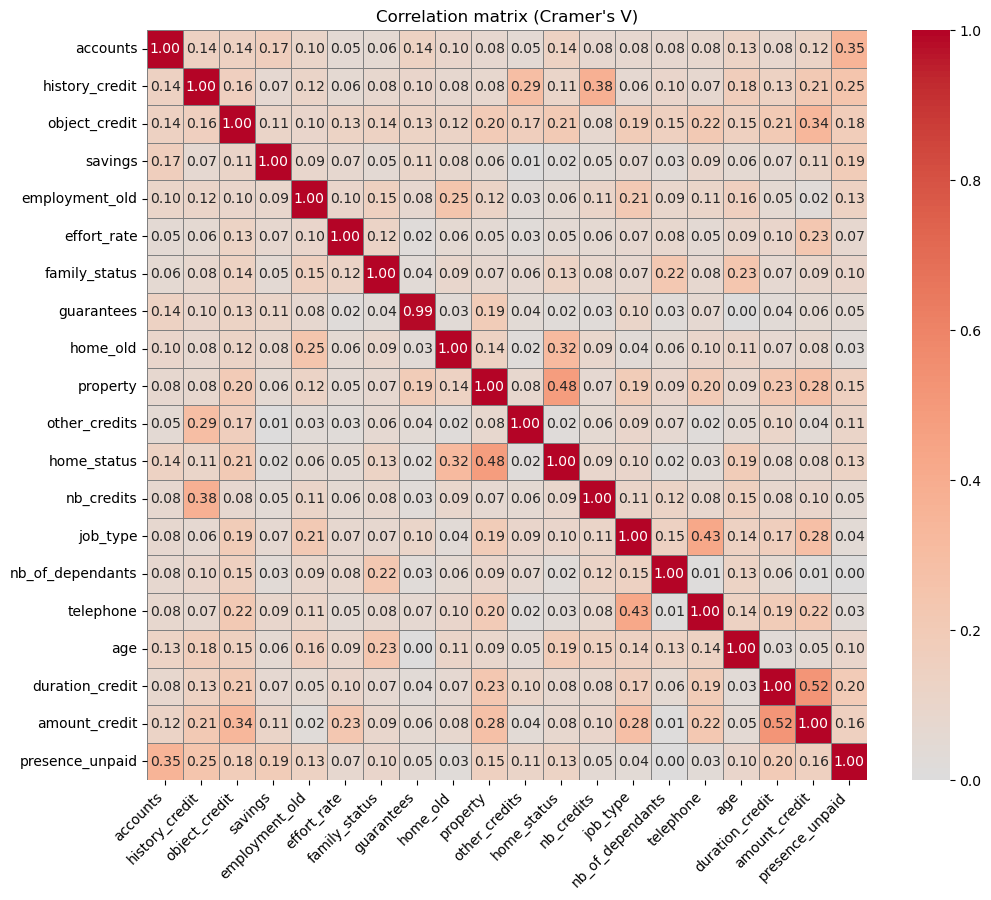

In [102]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)

sns.heatmap(cramer_df, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, linecolor="grey")

for i in range(cramer.shape[0]):
    plt.text(i + 0.5, i + 0.5, "",  ha="center", va="center", color="black", fontsize=8)

variable_names = credit2.columns

plt.xticks(np.arange(cramer.shape[0]) + 0.5, variable_names, rotation=45, ha="right", fontsize=10)
plt.yticks(np.arange(cramer.shape[0]) + 0.5, variable_names, rotation=0, ha="right", fontsize=10)

plt.title("Correlation matrix (Cramer's V)")
plt.show()

The strongest links are easily identified by their darker colour. The strongest link is between the duration and the amount of credit (Cramer's V = 0.52). Next comes the link between goods and residence status (Cramer's V = 0.48), then between the provision of a telephone number and the type of job (0.43), between the number of credits and credit history (0.33), and between the amount and the object of credit (0.33). 

Between variables appearing in a regression model, we can generally consider as troublesome the V of cramer exceeding 0.40 in absolute value. 


A cross-tabulation shows that the highest-valued asset is linked to the status of the home by only one modality for each variable: the 'no asset known' modality (A124) with the 'free accommodation' modality (A153). For the other categories of the 'property' variable, the proportion of tenants (A151), owners (A152) and those living rent-free is almost the same. This does not allow us to exclude one of the 2 variables at this stage, but we will have to remember this link if necessary.

In [103]:

tab = pd.crosstab(credit['property'], credit['home_status'])
prop_tab = tab.div(tab.sum(axis=1), axis=0) * 100

print(prop_tab)

home_status       A151       A152       A153
property                                    
A121         19.503546  80.141844   0.354610
A122         19.827586  79.310345   0.862069
A123         18.072289  81.626506   0.301205
A124         11.688312  20.779221  67.532468


In [104]:
tab2 = pd.crosstab(credit2['property'], credit2['home_status'])
prop_tab2 = tab2.div(tab2.sum(axis=1), axis=0) * 100

print(prop_tab2)

home_status      Not owner      owner
property                             
No property      79.220779  20.779221
Non-property     18.373494  81.626506
Not real estate  20.689655  79.310345
Property         19.858156  80.141844


The 2nd most linked pair of variables is the duration and amount of the loan. The strength of the relationship is due to the fact that 95% of loans of 15 months or less are for less than €4,000, while 83% of loans of more than 36 months are for more than €4,000. It is unlikely that the two variables can appear simultaneously in a regression model, and duration (Cramer's V = 0.20) is more discriminating than amount (Cramer's V = 0.16). We might even wonder whether the amount does not derive its discriminatory power from its link with duration, since the link with the risk of default is more obvious for duration than for amount, insofar as these amounts, which are much lower than for a home loan, do not result in monthly payments of different orders of magnitude.


In [105]:
tab = pd.crosstab(duration_credit, amount_credit)
prop_tab = tab.div(tab.sum(axis=1), axis=0)
print(prop_tab)

amount_credit    [0.0, 4000.0)  [4000.0, inf)
duration_credit                              
[0.0, 15.0)           0.950954       0.049046
[15.0, 36.0)          0.766739       0.233261
[36.0, inf)           0.294118       0.705882


In [106]:
tab2 = pd.crosstab(duration_credit, amount_credit)
prop_tab2 = tab2.div(tab2.sum(axis=1), axis=0)
print(prop_tab2)

amount_credit    [0.0, 4000.0)  [4000.0, inf)
duration_credit                              
[0.0, 15.0)           0.950954       0.049046
[15.0, 36.0)          0.766739       0.233261
[36.0, inf)           0.294118       0.705882


The cross-tabulation with the target confirms the superiority of duration. It provides a more balanced breakdown of the population, with no single category accounting for more than half of all credit applications. In addition, one of the categories (<= 15 months) is clearly less risky than the average, while another (>36 months) is clearly more risky, which will make it possible to better divide the applications between those that are more or less risky. If only one of the 2 variables needs to be retained, it will be the duration of the loan.

In [107]:
tab = pd.crosstab(amount_credit, credit['presence_unpaid'])
prop_tab = tab.div(tab.sum(axis=1), axis=0)

tab_with_margins = pd.concat([prop_tab, tab.sum(axis=0)], axis=1)
tab_with_margins.index.name = 'amount_credit'

tab_with_margins.rename(columns={0: 'Total'}, inplace=True) 

print(tab_with_margins)

                  Total         1  Total
amount_credit                           
[0.0, 4000.0)  0.741379  0.258621    NaN
[4000.0, inf)  0.573171  0.426829    NaN
0              0.741379  0.258621  700.0
1              0.741379  0.258621  300.0


 The other relationships between explanatory variables are more moderate.